# **El Perceptrón**

https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

¿Cómo ocurre la propagacion inversa por medio del gradiente descendiente? Revisar el link

Sugerencia: primero leer y entender la parte de la definición general (if __name__ == "__main__":) y despues entrar en el modelo del perceprtron (class NeuralNetwork())

Ph.D. (c) Manuel Vélez - 2020

In [19]:
#Librerías
from numpy import exp, array, random, dot
#Definición de Variables globales para la funcion de los diferentes procesos que se requieren
alfa=0;
steps=0;
errorTotal=[]
StepsCont=0
StepsFull=[]

In [20]:
print ("EL PERCEPTRON")
alfa=int(input("Ingrese el valor del alfa: "))
steps=int(input("Ingrese el valor de pasos: "))
print ("Cúal de los modelos desea elegir")
print ("1. Sigmoidea")
print ("2. Tangente Hiperbolica")
opcion=int(input("Opción: "))


EL PERCEPTRON
Ingrese el valor del alfa: 10
Ingrese el valor de pasos: 100
Cúal de los modelos desea elegir
1. Sigmoidea
2. Tangente Hiperbolica
Opción: 2


###Definición del Perceptrón

In [21]:
#Perceptrón
class NeuralNetwork():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(10)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 3 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    if (opcion == 1):
            # La función sigmoidea, que describe una función en forma de s, es la función de activación.
            # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
            def __sigmoid(self, x):
                return 1 / (1 + exp(-x))

            # La derivada de la función sigmoidea
            # es el gradiente descendiente de la función sigmoidea
            # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
            def __sigmoid_derivative(self, x):
                return x * (1 - x)
              # Entrenamos a la red neuronal a través de un proceso de prueba y error
            # Ajustamos los pesos sinápticos en cada iteración
            def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
                for iteration in range(number_of_training_iterations):
                    # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
                    output = self.think(training_set_inputs)

                    # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
                    # y la salida predicha).
                    error = training_set_outputs - output
                    errorTotal.append(error[0])

                    global StepsCont
                    StepsCont+=1
                    StepsFull.append(StepsCont)


                    # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
                    # Esto significa que los pesos menos confiables se ajustan más (filtrado) 
                    # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
                    adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

                    # Ajustar los pesos.
                    self.synaptic_weights += (adjustment*alfa)

            #Proceso de aprendizaje de la red neuronal:
            def think(self, inputs):
                # Pasamos las entradas a través de la red neuronal (una única neurona).
                return self.__sigmoid(dot(inputs, self.synaptic_weights)) #dot = producto punto

    elif (opcion == 2):

      # La función Tangente hiperbolica, es la función de activación.
      # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
      def __tangenteh(self, x):
          return (2/(1+exp(-2*x)))-1  
          
      # La derivada de la función Tangente hiperbolica
      # es el gradiente descendiente de la función Tangente hiperbolica
      # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
      def __tangenteh_derivative(self, x):
          return (4*exp(-2*x))/((exp(-2*x))+1)**2
        # Entrenamos a la red neuronal a través de un proceso de prueba y error

      # Ajustamos los pesos sinápticos en cada iteración
      def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
          for iteration in range(number_of_training_iterations):
              # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
              output = self.think(training_set_inputs)

              # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
              # y la salida predicha).
              error = training_set_outputs - output
              errorTotal.append(error[0])

              global StepsCont
              StepsCont+=1
              StepsFull.append(StepsCont)

              # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función Tangente hiperbolica.
              # Esto significa que los pesos menos confiables se ajustan más (filtrado) 
              # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
              adjustment = dot(training_set_inputs.T, error * self.__tangenteh_derivative(output))

              # Ajustar los pesos.
              self.synaptic_weights += (adjustment*alfa)

      #Proceso de aprendizaje de la red neuronal:
      def think(self, inputs):
          # Pasamos las entradas a través de la red neuronal (una única neurona).
          return self.__tangenteh(dot(inputs, self.synaptic_weights)) #dot = producto punto

    else:
      print ("no es una opción")


  

###Clase Principal

Pesos sinapticos iniciales generados aleatoriamente: 
[[ 0.54264129]
 [-0.9584961 ]
 [ 0.26729647]]
Nuevos pesos sinapticos después del entremaniento: 
[[13.94618875]
 [ 2.36487573]
 [ 7.79649042]]
Considerando las entradas: 
[1 0 0]
---------------------------
[1.]
1


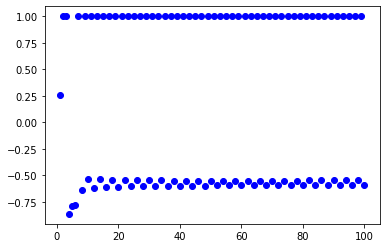

In [22]:
#Clase principal
if __name__ == "__main__":

    #Inicialice una red neuronal de una sola neurona. Quizas no sea propiamente una red... 
    neural_network = NeuralNetwork()

    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network.synaptic_weights)

    # El conjunto de entrenamiento. Tenemos 4 ejemplos, cada uno consistente de tres valores de entrada con su respectiva salida (una salida)
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Entrene a la red neuronal usando un conjunto de entrenamiento.
    # lo iteramos 10,000 veces, haciendo pequeños ajustes de pesos en cada iteración
    neural_network.train(training_set_inputs, training_set_outputs, steps)

    print ("Nuevos pesos sinapticos después del entremaniento: ")
    print (neural_network.synaptic_weights)

    # Pruebe la red neuronal con una situacion desconocida.
    test = array([1, 0, 0])
    print ("Considerando las entradas: ")
    print (test)
    print ("---------------------------")
    print (neural_network.think(test))
    resultado = neural_network.think(test)
    if (resultado <= 0.499):
        resultado = 0
    else:
        resultado = 1;
    print (resultado)

#grafica
import matplotlib.pyplot as plt
for i in range(len(errorTotal)):
  plt.scatter(StepsFull[i],(errorTotal[i]*-1),color="blue")

**Tarea**: 

1.   Agregue a este código la función de normalización para que produzca una salida discreta.
2.   Agregue la tasa de aprendizaje (denotada como alfa), recuerde que es un factor multiplicativo a la hora de corregir los pesos sinápticos con el error determinado
3.  Cree una variable aparte que permita modificar el número de épocas.
4.  Agregue una gráfica el cual me permita ver la disminución del error (o la cantidad de aprendizaje) vs el número de épocas. (Como en el ejemplo de funciones de activación).